In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pickle

Found 63520 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 484 images belonging to 2 classes.



Epoch 1/50


1985/1985 [==============================] - 1583s 797ms/step - loss: 0.1590 - accuracy: 0.9371 - val_loss: 3.2607e-04 - val_accuracy: 1.0000
Epoch 2/50
1985/1985 [==============================] - 1177s 593ms/step - loss: 0.0676 - accuracy: 0.9784 - val_loss: 1.1265e-04 - val_accuracy: 1.0000
Epoch 3/50
1985/1985 [==============================] - 1184s 597ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 1.2874e-05 - val_accuracy: 1.0000
Epoch 4/50
1985/1985 [==============================] - 1227s 618ms/step - loss: 0.0428 - accuracy: 0.9871 - val_loss: 1.6486e-04 - val_accuracy: 1.0000
Epoch 5/50
1985/1985 [==============================] - 1234s 622ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 2.6219e-05 - val_accuracy: 1.0000
Epoch 6/50
1985/1985 [==============================] - 1345s 678ms/step - loss: 0.0328 - accuracy: 0.9902

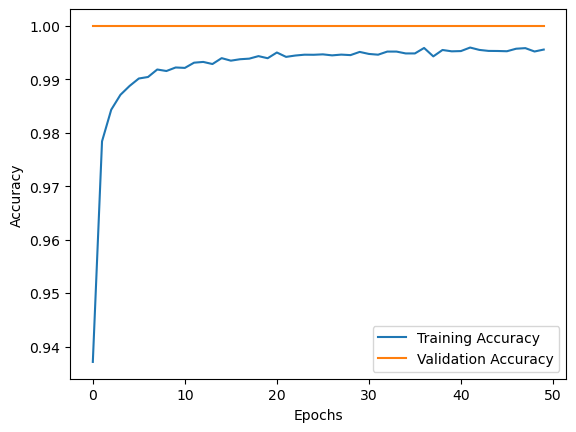

Pickle model saved successfully.


In [2]:
# Define paths to your dataset containing CNV and normal images
train_dir = r"C:\Users\UTKARSH\Documents\OCT2017\train"
validation_dir = r"C:\Users\UTKARSH\Documents\OCT2017\val"
test_dir = r"C:\Users\UTKARSH\Documents\OCT2017\test"

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Update the flow_from_directory calls
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True  # Ensure shuffling for better randomness
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # No need to shuffle validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # No need to shuffle test data
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification, so use 'sigmoid'
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the trained model using pickle
with open('CSR-Detection.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("Pickle model saved successfully.")


In [1]:
import tensorflow as tf
import pickle

# Define the image dimensions
img_width, img_height = 150, 150

# Define the predict function
def predict_csr_pickle(image_path, img_width=img_width, img_height=img_height):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    prediction = loaded_model_pickle.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Normal"
    else:
        return "CSR"

# Load the saved model using pickle
with open('CSR-Detection.pkl', 'rb') as f:
    loaded_model_pickle = pickle.load(f)
    print("Pickle model loaded successfully.")

# Example usage:
image_path = r"C:\Users\UTKARSH\OCT2017\Oct2017-2\test\CSR\CSR37.jpeg"
#image_path = r""C:\Users\UTKARSH\OCT2017\Oct2017-2\test\NORMAL\NORMAL-1957379-1.jpeg"
prediction_pickle = predict_csr_pickle(image_path)
print("Prediction using model:", prediction_pickle)





Pickle model loaded successfully.
1/1 [==============================] - 0s 479ms/step
Prediction using model: CSR
